# Is Aya more steerable in English? Using TyDIQA dataset

Description:
* Is Aya more steerable when prompted in English?
* Method: Apply steering vectors in multiple languages and analyze response shifts.
* Evaluation: Sentiment change, token difference.
* Input: Prompts with steering applied in different languages.
* Output: Degree of change in sentiment/tone based on steering language.
* Expected Insight: If English steering is more effective, Aya might have stronger alignment with English control signals.

This notebook `.ipynb` aims to do analysis on the `results/tydiqa_steering_results` result from the `experiments/steering_experiment` experiment.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
result_df = pd.read_csv("../results/tydiqa_steering_results.csv")

In [4]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   language                 5076 non-null   object
 1   question                 5076 non-null   object
 2   context                  5076 non-null   object
 3   neutral_prompt           5076 non-null   object
 4   steered_prompt           5076 non-null   object
 5   neutral_response         5076 non-null   object
 6   steered_response         5076 non-null   object
 7   neutral_sentiment_level  5076 non-null   int64 
 8   steered_sentiment_level  5076 non-null   int64 
 9   neutral_sentiment_name   5076 non-null   object
 10  steered_sentiment_name   5076 non-null   object
dtypes: int64(2), object(9)
memory usage: 436.3+ KB


In [5]:
print(f"Loaded {len(result_df)} rows.")
result_df.head()

Loaded 5076 rows.


,language,question,context,neutral_prompt,steered_prompt,neutral_response,steered_response,neutral_sentiment_level,steered_sentiment_level,neutral_sentiment_name,steered_sentiment_name
0,english,What is a way to increase your wound healing s...,Wound care encourages and speeds wound healing...,Answer the question based on the context.\nCon...,Answer the question in a cheerful and positive...,cleaning and protection from reinjury or infec...,"Oh, absolutely! There are several fantastic wa...",4,4,Very Positive,Very Positive
1,english,Who founded the Burntisland Shipbuilding Company?,Brothers Amos and Wilfrid Ayre founded Burntis...,Answer the question based on the context.\nCon...,Answer the question in a cheerful and positive...,Brothers Amos and Wilfrid Ayre,"Oh, what a fantastic question! The Burntisland...",4,4,Very Positive,Very Positive
2,english,What is the surface area of the human cortex?,The cerebral cortex is folded in a way that al...,Answer the question based on the context.\nCon...,Answer the question in a cheerful and positive...,1.3 square feet (0.12m2),"Wow, the human cerebral cortex is incredibly e...",4,4,Very Positive,Very Positive
3,english,How many units has Agatha Christie sold?,Guinness World Records lists Christie as the b...,Answer the question based on the context.\nCon...,Answer the question in a cheerful and positive...,roughly 2 billion copies,"Wow, Agatha Christie is absolutely phenomenal!...",0,4,Very Negative,Very Positive
4,english,When was Nájera established?,The town was conquered by Ordoño II of Leon fo...,Answer the question based on the context.\nCon...,Answer the question in a cheerful and positive...,"Based on the context provided, it is not expli...","Oh, what a fantastic question! While I don't h...",2,4,Neutral,Very Positive


In [6]:
# Compare sentiment levels between neutral and steered responses
neutral_sentiment_counts = result_df["neutral_sentiment_name"].value_counts()
steered_sentiment_counts = result_df["steered_sentiment_name"].value_counts()

print("Neutral Sentiment Distribution:")
print(neutral_sentiment_counts)

Neutral Sentiment Distribution:
neutral_sentiment_name
Positive         1817
Neutral          1385
Very Negative     867
Very Positive     811
Negative          196
Name: count, dtype: int64


The sentiment distribution in the **neutral** condition suggests that Aya's responses are generally balanced, with the largest group being **Positive (1817)** and **Neutral (1385)**. This indicates that when Aya responds without emotional steering, the majority of outputs are either positive or neutral, which is expected from a general-purpose model. The presence of **Very Negative (867)** and **Very Positive (811)** sentiments suggests that Aya occasionally generates extreme responses, though these are much less frequent. Additionally, the relatively low frequency of **Negative (196)** responses indicates that Aya is not inclined to provide negative answers in neutral conditions.

In [7]:
print("\nSteered Sentiment Distribution:")
print(steered_sentiment_counts)


Steered Sentiment Distribution:
steered_sentiment_name
Very Positive    2803
Positive          848
Neutral           644
Very Negative     621
Negative          160
Name: count, dtype: int64


In the **steered** condition, where prompts are explicitly designed to encourage positive responses, the sentiment distribution shows a clear shift towards more positive sentiments. **Very Positive (2803)** is the dominant sentiment, confirming that the steering mechanism is quite effective at pushing Aya's output toward a cheerful and positive tone. While **Positive (848)** and **Neutral (644)** responses still appear, their frequency is much lower compared to the **Very Positive** sentiment. Additionally, there are still some **Very Negative (621)** and **Negative (160)** responses, but they occur less frequently, indicating that steering does reduce but does not entirely eliminate negative sentiment.


In [8]:
# Create a new column for sentiment change
result_df["sentiment_change"] = result_df["steered_sentiment_level"] - result_df["neutral_sentiment_level"]

# Calculate the average sentiment change for each language
sentiment_change_by_language = result_df.groupby("language")["sentiment_change"].mean()

# Compare sentiment change in English with other languages
english_sentiment_change = sentiment_change_by_language["english"]
other_languages_sentiment_change = sentiment_change_by_language.drop("english")

# Print the results
print(f"Average Sentiment Change for English: {english_sentiment_change:.3f}")
print(f"Average Sentiment Change for Other Languages:\n{other_languages_sentiment_change}")

Average Sentiment Change for English: 1.568
Average Sentiment Change for Other Languages:
language
arabic        1.190011
bengali      -0.061947
finnish      -0.007673
indonesian    1.162832
korean        1.431159
russian       1.115764
swahili      -0.032064
telugu       -0.257485
Name: sentiment_change, dtype: float64


The **average sentiment change** by language reveals some interesting patterns in how steering impacts responses across languages.  
- **English (1.568)** shows the highest average sentiment change, indicating that the steering prompts are most effective in modifying Aya’s tone when prompted in English.
- **Korean (1.431)** and **Arabic (1.190)** also show significant sentiment shifts, suggesting that steering is fairly effective in these languages as well.
- On the other hand, languages like **Telugu (-0.257)**, **Bengali (-0.061)**, and **Swahili (-0.032)** show minimal or even negative sentiment change, implying that steering is less effective (and may even produce the opposite result) in these languages, or that Aya's responses in these languages are more resistant to emotional steering.


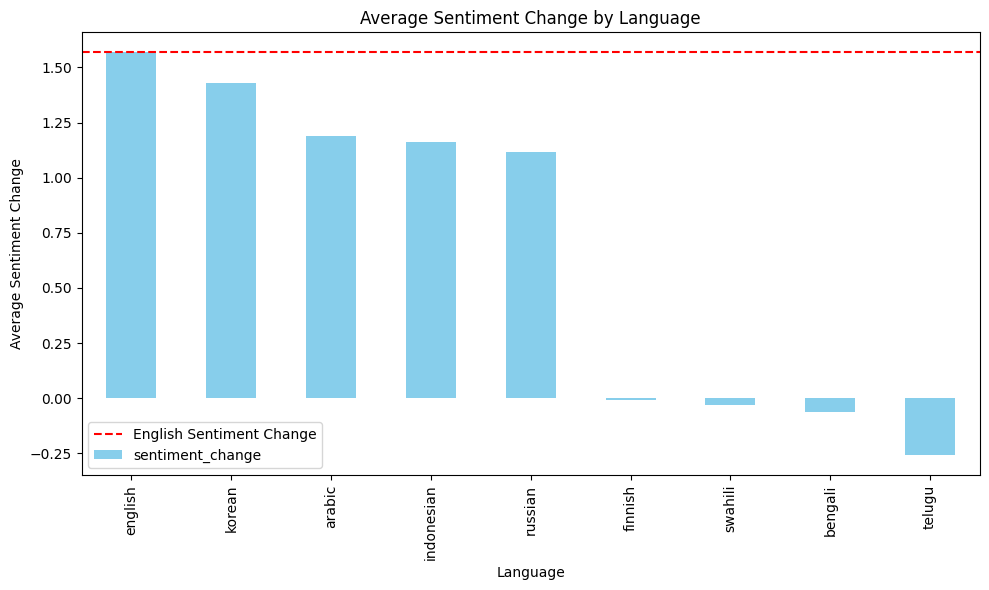

In [9]:
# Sort sentiment_change_by_language from highest to lowest
sorted_sentiment = sentiment_change_by_language.sort_values(ascending=False)

# Plot sentiment change for all languages (sorted)
plt.figure(figsize=(10, 6))
sorted_sentiment.plot(kind="bar", color="skyblue")
plt.axhline(english_sentiment_change, color="red", linestyle="--", label="English Sentiment Change")
plt.title("Average Sentiment Change by Language")
plt.xlabel("Language")
plt.ylabel("Average Sentiment Change")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
# Create summary of the analysis
summary = {
    "Average Sentiment Change for English": english_sentiment_change,
    "Average Sentiment Change for Other Languages": other_languages_sentiment_change.mean(),
    "Top 3 Languages with the Most Sentiment Change": sentiment_change_by_language.nlargest(3),
    "Top 3 Languages with the Least Sentiment Change": sentiment_change_by_language.nsmallest(3),
}

# Print the summary
for key, value in summary.items():
    print(f"{key}: {value}")

Average Sentiment Change for English: 1.5681818181818181
Average Sentiment Change for Other Languages: 0.5675746235169582
Top 3 Languages with the Most Sentiment Change: language
english    1.568182
korean     1.431159
arabic     1.190011
Name: sentiment_change, dtype: float64
Top 3 Languages with the Least Sentiment Change: language
telugu    -0.257485
bengali   -0.061947
swahili   -0.032064
Name: sentiment_change, dtype: float64


There is a significant difference between the **average sentiment change** for English (1.568) and the rest of the languages (0.568). This suggests that **steering is more effective** in English compared to other languages. The fact that the sentiment change for English is nearly three times higher than for other languages indicates that **Aya’s responses in English are more steerable** when prompted to adjust tone or sentiment.


The top three languages with the **most sentiment change**—**English (1.568)**, **Korean (1.431)**, and **Arabic (1.190)**—further confirm that steering works well in certain languages. **English** stands out as the most steerable language, with a **strong shift towards positivity**, followed by **Korean** and **Arabic**, which also show notable changes. This suggests that these languages are particularly receptive to the steering mechanism, likely due to the model's better understanding of cultural contexts or available training data.


In contrast, **Telugu (-0.257)**, **Bengali (-0.062)**, and **Swahili (-0.032)** exhibit the least sentiment change, with some even showing a **negative sentiment shift**. This suggests that in these languages, **steering prompts** have a minimal or even counterproductive effect, possibly due to language-specific challenges in sentiment modulation. These results may point to **Aya’s model not being as fine-tuned for these languages**, or to inherent limitations in the steering mechanism when applied to these particular linguistic and cultural contexts.


# ✨ Summary Conclusion

- Aya shows **strong steerability in English**, with a significant shift in sentiment when steering prompts are applied.
- **Steering effectiveness varies across languages**, with English showing the **largest sentiment change**, while other languages like **Telugu**, **Bengali**, and **Swahili** show minimal or even negative sentiment shifts.
- The **language of the prompt** plays a significant role in Aya's response, with **English steering signals** producing the most noticeable impact.
- The average **sentiment change across languages** is **higher in English (1.568)** compared to **other languages (0.568)**, confirming that **Aya is more steerable in English**.
- Languages like **Korean** and **Arabic** show moderate steering effectiveness, while languages like **Telugu**, **Bengali**, and **Swahili** exhibit poor or negative results with steering.

### 🎯 Main Question Answer:
> **Is Aya more steerable in English?**  
>  
> ✅ **Yes, Aya is more steerable in English.**  
>  
> The sentiment shift in response to steering prompts is notably stronger in English, with an average sentiment change of **1.568**, compared to **0.568** for other languages.  
>  
> While **Korean** and **Arabic** show moderate steering effectiveness, **English** stands out as the most responsive language, indicating that Aya is **more aligned with English steering signals**.